# Downloading the dataset

### Automatic installation:

1. Download kaggle api token
   - Go to https://www.kaggle.com/settings/account and scroll until you see 'Create New Token'
2. Move kaggle.json to ~/.kaggle
   - Run command `mv kaggle.json ~/.kaggle && chmod 600 ~/.kaggle/kaggle.json`
3. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition

### Manual installation:

1. Join competition
   - Go to https://www.kaggle.com/competitions/widsdatathon2025/data and join competition
2. Download dataset
3. Unzip and move contents to `./data` directory


In [5]:
import os

DATA_DIR = './data'
COMPETITION_NAME = 'widsdatathon2025'

if not os.path.isdir(DATA_DIR):
    import kaggle
    import zipfile

    kaggle.api.authenticate()
    kaggle.api.competition_download_files(competition=COMPETITION_NAME)
    
    zip_path = f'{COMPETITION_NAME}.zip'
    with zipfile.ZipFile(zip_path, 'r') as zip:
        zip.extractall(DATA_DIR)
    os.remove(zip_path)

# Data exploration
### Importing data and viewing some tables
Importing the .xlsx and .csv training data and testing data into pandas dataframes and analyzing their shapes and structures.

In [7]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TRAIN_DIR = DATA_DIR + '/TRAIN_NEW'
TEST_DIR = DATA_DIR + '/TEST'

categorical_df = pd.read_excel(TRAIN_DIR + '/TRAIN_CATEGORICAL_METADATA_new.xlsx')
quantitative_df = pd.read_excel(TRAIN_DIR + '/TRAIN_QUANTITATIVE_METADATA_new.xlsx')
connectome_df = pd.read_csv(TRAIN_DIR + '/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')
solutions_df = pd.read_excel(TRAIN_DIR + '/TRAINING_SOLUTIONS.xlsx')

categorical_df_test = pd.read_excel(TEST_DIR + '/TEST_CATEGORICAL.xlsx')
quantitative_df_test = pd.read_excel(TEST_DIR + '/TEST_QUANTITATIVE_METADATA.xlsx')
connectome_df_test = pd.read_csv(TEST_DIR + '/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')

with open("categorical_labels.json", "r") as file:
    categorical_labels = json.load(file)

# json cant store keys of type int, cast int keys back to int
categorical_labels = {category: {int(key): label for key, label in mapping.items()} for category, mapping in categorical_labels.items()}

print("Training categorical metadata:\n")
categorical_df

Training categorical metadata:



participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0      00aIpNTbG5uh                     2019                       4   
1      00fV0OyyoLfw                     2017                       1   
2      04X1eiS79T4B                     2017                       1   
3      05ocQutkURd6                     2018                       1   
4      06YUNBA9ZRLq                     2018                       1   
...             ...                      ...                     ...   
1208   zwjJWCRzKhDz                     2019                       4   
1209   zwXD5v17Rx01                     2018                       1   
1210   zWzLCi3NTBTd                     2018                       3   
1211   Zy9GTHDxUbXU                     2019                       4   
1212   Zye7yYRQohXi                     2017                       1   

      PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                                  1.0                          0.0   
1                                  0.0                          9.0   
2                                  1.0                          2.0   
3                                  3.0                          8.0   
4                                  0.0                          1.0   
...                                ...                          ...   
1208                               1.0                          1.0   
1209                               0.0                          0.0   
1210                               2.0                          3.0   
1211                               0.0                          1.0   
1212                               0.0                          0.0   

      MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                         3.0                    21.0                    45.0   
1                         2.0                    21.0                     0.0   
2                         2.0                     9.0                     0.0   
3                         2.0                    18.0                    10.0   
4                         2.0                    12.0                     0.0   
...                       ...                     ...                     ...   
1208                      3.0                    12.0                     NaN   
1209                      3.0                    21.0                    40.0   
1210                      3.0                    21.0                    40.0   
1211                      3.0                    18.0                    35.0   
1212                      2.0                    18.0                    35.0   

      Barratt_Barratt_P2_Edu  Barratt_Barratt_P2_Occ  
0                        NaN                     NaN  
1                       21.0                    45.0  
2                        NaN                     NaN  
3                       18.0                     0.0  
4                        NaN                     NaN  
...                      ...                     ...  
1208                    15.0                     5.0  
1209                    21.0                    40.0  
1210                    21.0                    35.0  
1211                    18.0                    45.0  
1212                    15.0                    35.0  

[1213 rows x 10 columns]

In [8]:
solutions_df

participant_id  ADHD_Outcome  Sex_F
0      UmrK0vMLopoR             1      1
1      CPaeQkhcjg7d             1      0
2      Nb4EetVPm3gs             1      0
3      p4vPhVu91o4b             1      1
4      M09PXs7arQ5E             1      1
...             ...           ...    ...
1208   Atx7oub96GXS             0      0
1209   groSbUfkQngM             0      1
1210   zmxGvIrOD0bt             0      1
1211   rOmWFuJCud5G             0      0
1212   k8HhHnnu2wmt             0      0

[1213 rows x 3 columns]

In [9]:
print("Training quantitative metadata:\n")
quantitative_df

Training quantitative metadata:



participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0      00aIpNTbG5uh         100.00                  13.0             3.0   
1      00fV0OyyoLfw          92.27                  14.0             3.0   
2      04X1eiS79T4B          86.67                  14.0             3.0   
3      05ocQutkURd6          93.34                  14.0             3.0   
4      06YUNBA9ZRLq           0.00                  14.0             8.0   
...             ...            ...                   ...             ...   
1208   zwjJWCRzKhDz         100.00                  14.0             3.0   
1209   zwXD5v17Rx01          46.67                  14.0             3.0   
1210   zWzLCi3NTBTd         -40.00                  14.0             3.0   
1211   Zy9GTHDxUbXU         100.00                  14.0             3.0   
1212   Zye7yYRQohXi          87.80                  14.0             3.0   

      APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0               15.0             44.0             14.0            20.0   
1               12.0             35.0             25.0            28.0   
2               21.0             37.0             18.0            26.0   
3               11.0             42.0             15.0            20.0   
4               12.0             35.0             22.0            12.0   
...              ...              ...              ...             ...   
1208            14.0             36.0             18.0            13.0   
1209            18.0             42.0             21.0            15.0   
1210            19.0             34.0             20.0            20.0   
1211             9.0             45.0             23.0            11.0   
1212             8.0             45.0             16.0            13.0   

      APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
0               27.0                       3.0                        17.0   
1               30.0                       5.0                        20.0   
2               28.0                       3.0                        24.0   
3               28.0                       0.0                         5.0   
4               24.0                       6.0                        23.0   
...              ...                       ...                         ...   
1208            22.0                       5.0                        20.0   
1209            25.0                       2.0                         5.0   
1210            25.0                       2.0                        14.0   
1211            30.0                       1.0                        10.0   
1212            24.0                       2.0                        11.0   

      SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
0                            4.0                   11.0   
1                            4.0                   13.0   
2                            7.0                   10.0   
3                            0.0                    3.0   
4                            7.0                   15.0   
...                          ...                    ...   
1208                         5.0                   13.0   
1209                         0.0                    5.0   
1210                         3.0                    9.0   
1211                         0.0                    8.0   
1212                         2.0                    9.0   

      SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  SDQ_SDQ_Internalizing  \
0                           5.0                    8.0                    6.0   
1                           5.0                    8.0                    7.0   
2                          10.0                    7.0                   14.0   
3                           0.0                    3.0                    2.0   
4                           8.0                    9.0                    8.0   
...                         ...                    ...                 

In [10]:
print("Functional connectome matrices:\n")
connectome_df

Functional connectome matrices:



participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1      WHWymJu6zNZi          0.614765          0.577255          0.496127   
2      4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3      obEacy4Of68I          0.199688          0.752714          0.658283   
4      s7WzzDcmDOhF          0.227321          0.613268          0.621447   
...             ...               ...               ...               ...   
1208   9gpepMI9sj5q          0.265284          0.551726          0.628318   
1209   FIDen5rdMc0v         -0.018377          0.576689          0.527451   
1210   dlsMC4TXL4e8          0.227028          0.405659          0.023545   
1211   syeyZjEx8FUx          0.189849          0.752876          0.842463   
1212   wWZUoBUOOXhT          0.165500          0.779444          0.686992   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0             0.060457          0.566489          0.315342          0.508408   
1             0.496606          0.404686          0.439724          0.122590   
2             0.639031          0.769337          0.442528          0.637110   
3             0.575096          0.692867          0.645789          0.522750   
4             0.562673          0.736709          0.589813          0.266676   
...                ...               ...               ...               ...   
1208          0.647700          0.710757          0.132334          0.326207   
1209          0.327463          0.586868          0.573689          0.300544   
1210         -0.093085         -0.068960          0.647574          0.762552   
1211          0.817037          0.820196          0.792950          0.650929   
1212          0.723378          0.747767          0.616990          0.513525   

      0throw_8thcolumn  0throw_9thcolumn  ...  195throw_196thcolumn  \
0            -0.078290          0.525692  ...              0.224985   
1            -0.085452          0.120673  ...              0.217546   
2             0.192010          0.520379  ...              0.342487   
3             0.412188          0.530843  ...              0.103562   
4             0.359668          0.300771  ...             -0.164956   
...                ...               ...  ...                   ...   
1208          0.354319          0.531170  ...              0.127097   
1209          0.301103          0.659840  ...              0.482214   
1210          0.465109          0.199337  ...             -0.379304   
1211          0.488504          0.580207  ...             -0.212254   
1212          0.301234          0.392071  ...             -0.185250   

      195throw_197thcolumn  195throw_198thcolumn  195throw_199thcolumn  \
0                 0.397448              0.422966              0.184642   
1                -0.014549              0.000440             -0.096451   
2                -0.021141             -0.037836              0.075069   
3                -0.178313              0.210983             -0.018666   
4                 0.007064             -0.120904             -0.488095   
...                    ...                   ...                   ...   
1208              0.129787              0.298987              0.114577   
1209             -0.159587             -0.162498             -0.093249   
1210              0.126976              0.193695              0.214483   
1211             -0.055539             -0.221935             -0.202464   
1212             -0.290530             -0.276083             -0.384149   

      196throw_197thcolumn  196throw_198thcolumn  196throw_199thcolumn  \
0                 0.305549              0.420349              0.016328   
1                 0.454501              0.343916              0.167313   
2                 0.412712              0.292708              0.391005   
3                 0.436313              0.592982              0.216205   
4      

### Verifying amount of samples/individuals in testing and training data

In [12]:
print("Number of individuals in training data: ", len(categorical_df))
print("Number of individuals in testing data: ", len(categorical_df_test))

Number of individuals in training data:  1213
Number of individuals in testing data:  304


### Taking a deeper look into the quantitative/qualitative data

The categorical data is listed as ints in the metadata, but these ints are considered categorical. Here we look at their values and all potential options for a category.

In [15]:
#print(categorical_labels)
for key, values in categorical_labels.items():
    print(key)  # category label
    print(values)  # options for category

ADHD_Outcome
{0: 'Other/None', 1: 'ADHD'}
Sex_F
{0: 'Male', 1: 'Female'}
Basic_Demos_Study_Site
{1: 'Staten Island', 2: 'MRV', 3: 'Midtown', 4: 'Harlem', 5: 'SI RUMC'}
PreInt_Demos_Fam_Child_Ethnicity
{0: 'Not Hispanic or Latino', 1: 'Hispanic or Latino', 2: 'Decline to specify', 3: 'Unknown'}
PreInt_Demos_Fam_Child_Race
{0: 'White/Caucasian', 1: 'Black/African American', 2: 'Hispanic', 3: 'Asian', 4: 'Indian', 5: 'Native American Indian', 6: 'American Indian/Alaskan Native', 7: 'Native Hawaiian/Other Pacific Islander', 8: 'Two or more races', 9: 'Other race', 10: 'Unknown', 11: 'Choose not to specify'}
MRI_Track_Scan_Location
{1: 'Staten Island', 2: 'RUBIC', 3: 'CBIC', 4: 'CUNY'}
Barratt_Edu
{3: 'Less than 7th grade', 6: 'Junior high/Middle school (9th grade)', 9: 'Partial high school (10th or 11th grade)', 12: 'High school graduate', 15: 'Partial college (at least one year)', 18: 'College education', 21: 'Graduate degree'}
Barratt_Occ
{0: 'Homemaker, stay at home parent.', 5: 'Day la

### Targets

Analyzing our target variables, ADHD_Outcome (Other/None, ADHD), and Sex_F (Male, Female). There are clear class imbalances and biases here, as there is more data for individuals with ADHD and more individuals that are male. This makes sense given that the families that participated in this research were more inclined to because of their child's likely ADHD diagnosis, and it is more commonly identified in males.
Another thing we want to make note of right away is the proportion of males and females. There seem to be more true cases of ADHD in males here, probably because more males than females participated in the study.

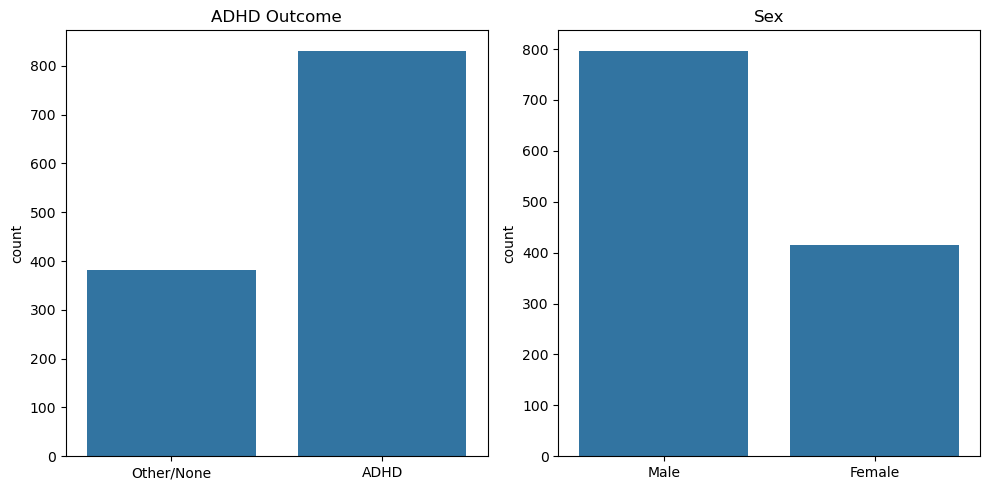

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title("ADHD Outcome")
sns.countplot(x='ADHD_Outcome', data=solutions_df, ax=ax)
labels = categorical_labels['ADHD_Outcome'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title("Sex")
sns.countplot(x='Sex_F', data=solutions_df, ax=ax)
labels = categorical_labels['Sex_F'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

fig.tight_layout()

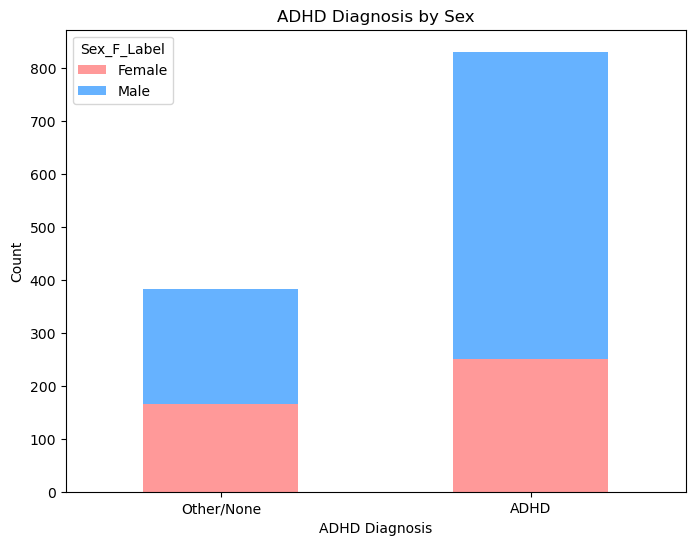

In [18]:
#solutions_df = solutions_df.drop(columns=["participant_id"])
solutions_df['Sex_F_Label'] = solutions_df['Sex_F'].map(categorical_labels['Sex_F'])

adhd_sex_counts = pd.crosstab(solutions_df['ADHD_Outcome'], solutions_df['Sex_F_Label'])
adhd_sex_counts.plot(kind='bar', stacked=True, color=['#FF9999', '#66B2FF'], figsize=(8, 6))
plt.title('ADHD Diagnosis by Sex')
plt.ylabel('Count')
plt.xlabel('ADHD Diagnosis')
labels = categorical_labels['ADHD_Outcome'].values()
plt.xticks(range(len(labels)), labels, rotation=0)
plt.show()


### Looking for missing values

Using .info() to display the value count for each column. The Non-Null Count column lets us know how many cells are actually filled in so we can see how many missing values there are for each. Many variables/columns in both categorical and quantitative data have blank values, so this will need to be addressed before model training begins.

In [20]:
print("***TRAINING DATA***\n")
print(categorical_df.info())
print(quantitative_df.info())
print("\n")

print("***TESTING DATA***\n")
print(categorical_df_test.info())
print(quantitative_df_test.info())

***TRAINING DATA***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex

### Checking for duplicate values

Checking if there are any duplicate participant IDs in the training and testing datasets. There do not seem to be any, so this won't be a concern for our project.

In [22]:
print("Number of duplicates in quantitative metadata (training): ", quantitative_df.duplicated().sum())
print("Number of duplicates in categorical metadata (training): ", categorical_df.duplicated().sum())
print("Number of duplicates in quantitative metadata (testing): ", quantitative_df_test.duplicated().sum())
print("Number of duplicates in categorical metadata (testing): ", categorical_df_test.duplicated().sum())

Number of duplicates in quantitative metadata (training):  0
Number of duplicates in categorical metadata (training):  0
Number of duplicates in quantitative metadata (testing):  0
Number of duplicates in categorical metadata (testing):  0


### Observing the data's statistics
Using .describe() to see if the quantitative data is skewed or has outliers. First we look at the training quantitative data, then the test quantitative data.

In [24]:
quantitative_df.describe()

EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1200.000000           1190.000000     1201.000000     1201.000000   
mean       59.514750             13.419328        3.819317       13.337219   
std        49.744631              2.112830        1.330348        3.593562   
min      -100.000000              0.000000        2.000000        5.000000   
25%        46.670000             14.000000        3.000000       11.000000   
50%        77.800000             14.000000        3.000000       13.000000   
75%        94.470000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1201.000000      1201.000000     1201.000000     1201.000000   
mean         39.767694        17.963364       16.557036       25.498751   
std           4.872729         3.333965        5.146548        3.053720   
min          23.000000         7.000000        5.000000       13.000000   
25%          36.000000        16.000000       13.000000       23.000000   
50%          40.000000        18.000000       16.000000       26.000000   
75%          43.000000        20.000000       19.000000       28.000000   
max          50.000000        28.000000       37.000000       30.000000   

       SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
count               1204.000000                 1204.000000   
mean                   2.074751                   12.213455   
std                    2.022992                    6.517330   
min                    0.000000                    0.000000   
25%                    0.000000                    7.000000   
50%                    2.000000                   12.000000   
75%                    3.000000                   17.000000   
max                   10.000000                   34.000000   

       SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
count                 1204.000000            1204.000000   
mean                     2.324751               7.613787   
std                      2.166399               4.130399   
min                      0.000000               0.000000   
25%                      1.000000               5.000000   
50%                      2.000000               8.000000   
75%                      4.000000              10.000000   
max                     10.000000              20.000000   

       SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
count                1204.000000            1204.000000   
mean                    4.103821               5.539037   
std                     2.808079               2.807063   
min                     0.000000               0.000000   
25%                     2.000000               4.000000   
50%                     4.000000               6.000000   
75%                     6.000000               8.000000   
max                    10.000000              10.000000   

       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  \
count            1204.000000            1204.000000        1204.000000   
mean                4.599668               2.274917           7.740864   
std                 3.510469               2.089041           2.094832   
min                 0.000000               0.000000           0.000000   
25%                 2.000000               0.000000           6.000000   
50%                 4.000000               2.000000           8.000000   
75%                 7.000000               4.000000          10.000000   
max                17.000000               9.000000          10.000000   

       MRI_Track_Age_at_Scan  
count             853.000000  
mean               11.245678  
std                 3.234372  
min                 0.000000  
25%                 8.803901  
50%                10.739219  
75%                13.460871  
max                21.564453

In [25]:
quantitative_df_test.describe()

EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count     303.000000            295.000000      289.000000      289.000000   
mean       59.144488             13.240678        3.321799       13.259516   
std        49.330962              1.986273        0.810248        3.627411   
min      -100.050000              0.000000        2.000000        6.000000   
25%        50.060000             13.000000        3.000000       11.000000   
50%        73.370000             14.000000        3.000000       13.000000   
75%        93.380000             14.000000        3.000000       16.000000   
max       100.050000             14.000000        8.000000       23.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count       289.000000       289.000000      289.000000      289.000000   
mean         39.633218        16.726644       15.944637       24.826990   
std           5.153586         3.360000        4.931163        3.283666   
min          20.000000         7.000000        9.000000       10.000000   
25%          36.000000        14.000000       12.000000       23.000000   
50%          40.000000        17.000000       15.000000       25.000000   
75%          43.000000        19.000000       19.000000       28.000000   
max          50.000000        27.000000       31.000000       30.000000   

       SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  \
count                274.000000                  274.000000   
mean                   1.890511                   11.781022   
std                    1.973000                    6.056771   
min                    0.000000                    0.000000   
25%                    0.000000                    7.000000   
50%                    1.000000                   11.000000   
75%                    3.000000                   16.000000   
max                   10.000000                   29.000000   

       SDQ_SDQ_Emotional_Problems  SDQ_SDQ_Externalizing  \
count                  274.000000             274.000000   
mean                     2.390511               7.474453   
std                      2.139131               4.122804   
min                      0.000000               0.000000   
25%                      1.000000               4.000000   
50%                      2.000000               7.000000   
75%                      4.000000              10.750000   
max                     10.000000              18.000000   

       SDQ_SDQ_Generating_Impact  SDQ_SDQ_Hyperactivity  \
count                 274.000000             274.000000   
mean                    3.945255               5.583942   
std                     2.687768               2.821016   
min                     0.000000               0.000000   
25%                     2.000000               4.000000   
50%                     4.000000               6.000000   
75%                     6.000000               8.000000   
max                    10.000000              10.000000   

       SDQ_SDQ_Internalizing  SDQ_SDQ_Peer_Problems  SDQ_SDQ_Prosocial  \
count             274.000000             274.000000         274.000000   
mean                4.306569               1.916058           7.726277   
std                 3.421676               1.997314           2.084717   
min                 0.000000               0.000000           0.000000   
25%                 1.000000               0.000000           6.000000   
50%                 4.000000               1.000000           8.000000   
75%                 7.000000               3.000000          10.000000   
max                15.000000               9.000000          10.000000   

       MRI_Track_Age_at_Scan  
count             304.000000  
mean               11.206715  
std                 3.406516  
min                 7.007871  
25%                 8.558207  
50%                10.246749  
75%                13.406741  
max                21.561943

### Demographics

Using histograms to plot some of the categorical demographic data from the training dataset, including individual's year of enrollment, where they participated in phenotypic testing, and their race and ethnicity. From here we can also observe whether or not the data is skewed.

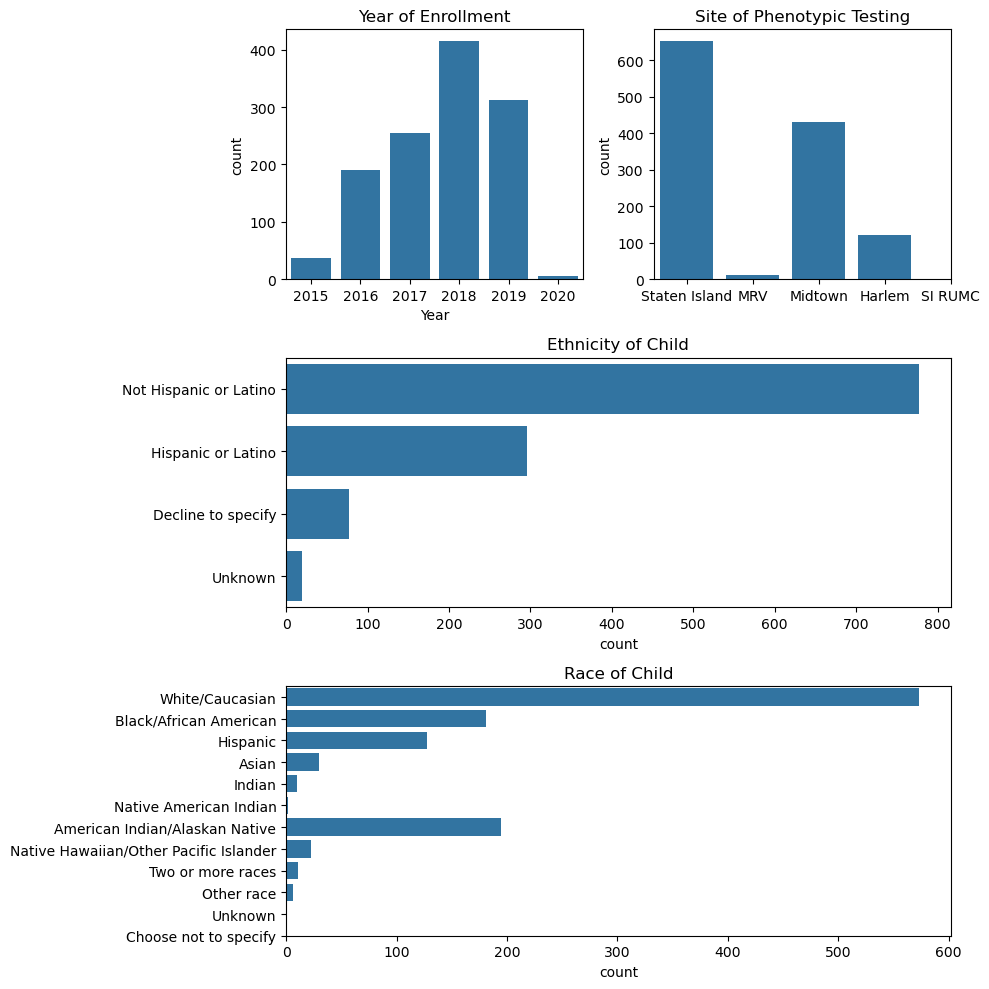

In [27]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 2)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('Year of Enrollment')
sns.countplot(x='Basic_Demos_Enroll_Year', data=categorical_df, ax=ax)
ax.set_xlabel('Year')

ax = fig.add_subplot(gs[0, 1])
ax.set_title('Site of Phenotypic Testing')
sns.countplot(x='Basic_Demos_Study_Site', data=categorical_df, ax=ax)
labels = categorical_labels['Basic_Demos_Study_Site'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = fig.add_subplot(gs[1, 0:2])
ax.set_title('Ethnicity of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Ethnicity', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Ethnicity'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = fig.add_subplot(gs[2, 0:2])
ax.set_title('Race of Child')
sns.countplot(y='PreInt_Demos_Fam_Child_Race', data=categorical_df, ax=ax)
labels = categorical_labels['PreInt_Demos_Fam_Child_Race'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

fig.tight_layout()

### Barratt Simplified Measure of Social Status

Looking at the data for each parent's level of education and their occupations found in the categorical dataframe.

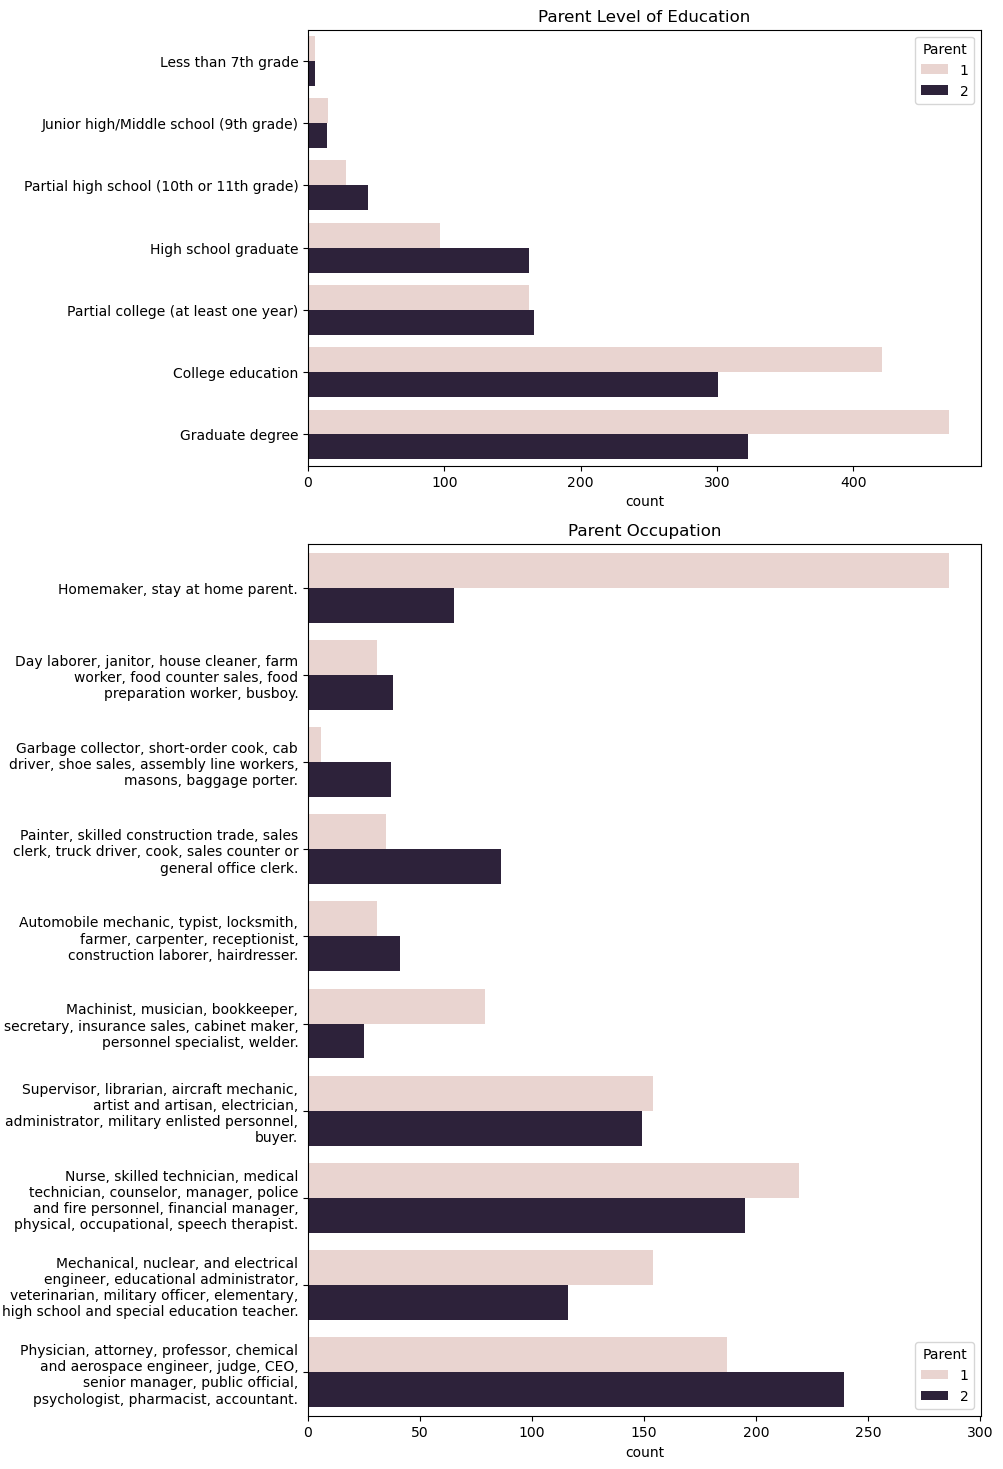

In [29]:
parent_edu_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu'],
    var_name="Parent", value_name="Barratt_Edu"
)

parent_occ_df = categorical_df.melt(
    value_vars=['Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'],
    var_name="Parent", value_name="Barratt_Occ"
)

parent_edu_df["Parent"] = parent_edu_df["Parent"].map({"Barratt_Barratt_P1_Edu": 1,"Barratt_Barratt_P2_Edu": 2,})
parent_occ_df["Parent"] = parent_occ_df["Parent"].map({"Barratt_Barratt_P1_Occ": 1, "Barratt_Barratt_P2_Occ": 2})

fig, axes = plt.subplots(2, figsize=(10, 15), height_ratios=[1, 2])
axes = iter(axes)

ax = next(axes)
ax.figure
ax.set_title("Parent Level of Education")
sns.countplot(y='Barratt_Edu', hue='Parent', data=parent_edu_df, ax=ax)
labels = categorical_labels['Barratt_Edu'].values()
ax.set_yticks(range(len(labels)), labels)
ax.set_ylabel(None)

ax = next(axes)
ax.set_title("Parent Occupation")
sns.countplot(y='Barratt_Occ', hue='Parent', data=parent_occ_df, ax=ax)
labels = categorical_labels['Barratt_Occ'].values()
ax.set_yticks(range(len(labels)), labels, wrap=True)
ax.set_ylabel(None)

fig.tight_layout()

### Edinburgh Handedness Questionnaire & Ishihara Color Vision Test

Looking at the child's handedness and color vision test scores. The majority appear to be right-handed and have a high color vision score.

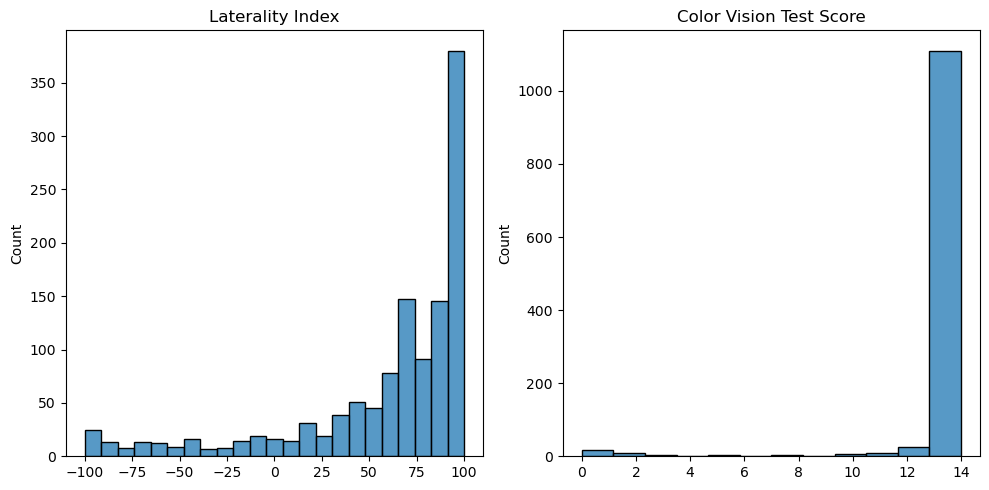

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Laterality Index')
sns.histplot(quantitative_df['EHQ_EHQ_Total'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Color Vision Test Score')
sns.histplot(quantitative_df['ColorVision_CV_Score'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Alabama Parenting Questionnaire - Parent Report
According to Youth Coalition: The APQ measures five dimensions of parenting that are relevant to the etiology and treatment of child externalizing problems: (1) positive involvement with children, (2) supervision and monitoring, (3) use of positive discipline techniques, (4) consistency in the use of such discipline and (5) use of corporal punishment. 

The Positive Parenting Score is skewed to the right, which indicates that most parents reported strong involvement with their kids. Most parents don't seem to use corporeal punishment. Some different parenting styles are observed (supervision score). 

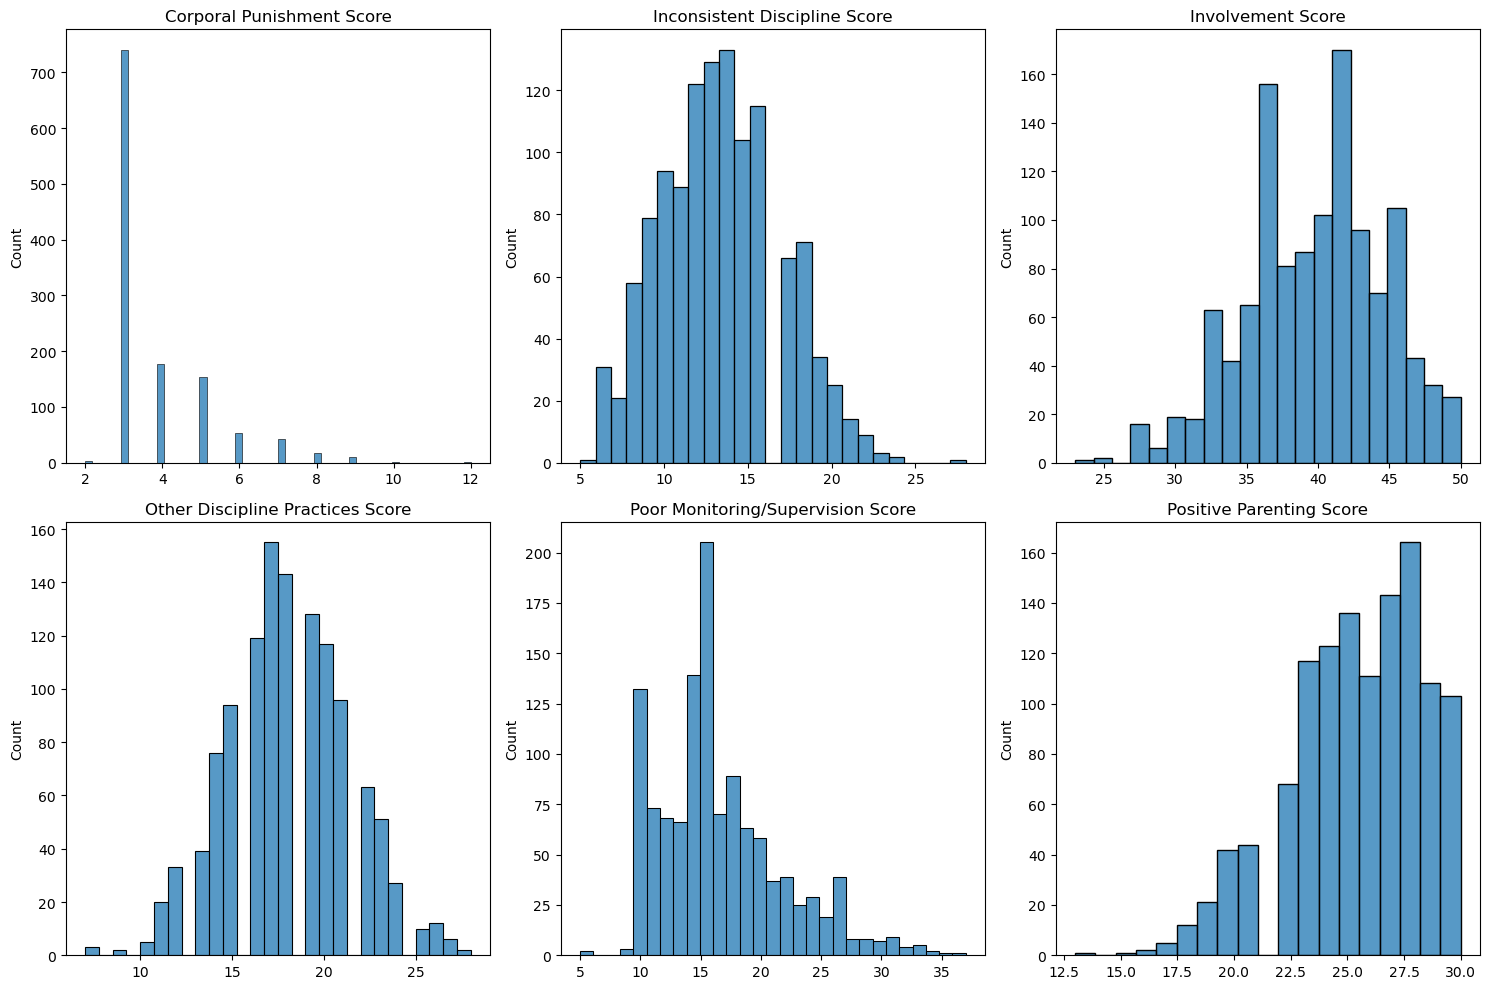

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = iter(axes.flatten())

ax = next(axes)
ax.set_title('Corporal Punishment Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_CP'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Inconsistent Discipline Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_ID'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Involvement Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_INV'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Other Discipline Practices Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_OPD'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Poor Monitoring/Supervision Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_PM'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Positive Parenting Score')
sns.histplot(quantitative_df['APQ_P_APQ_P_PP'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Strength and Difficulties Questionnaire
The strength and difficulties is a brief behavioral screening tool designed to assess the emotional and behavioral well-being of children and adolescents.

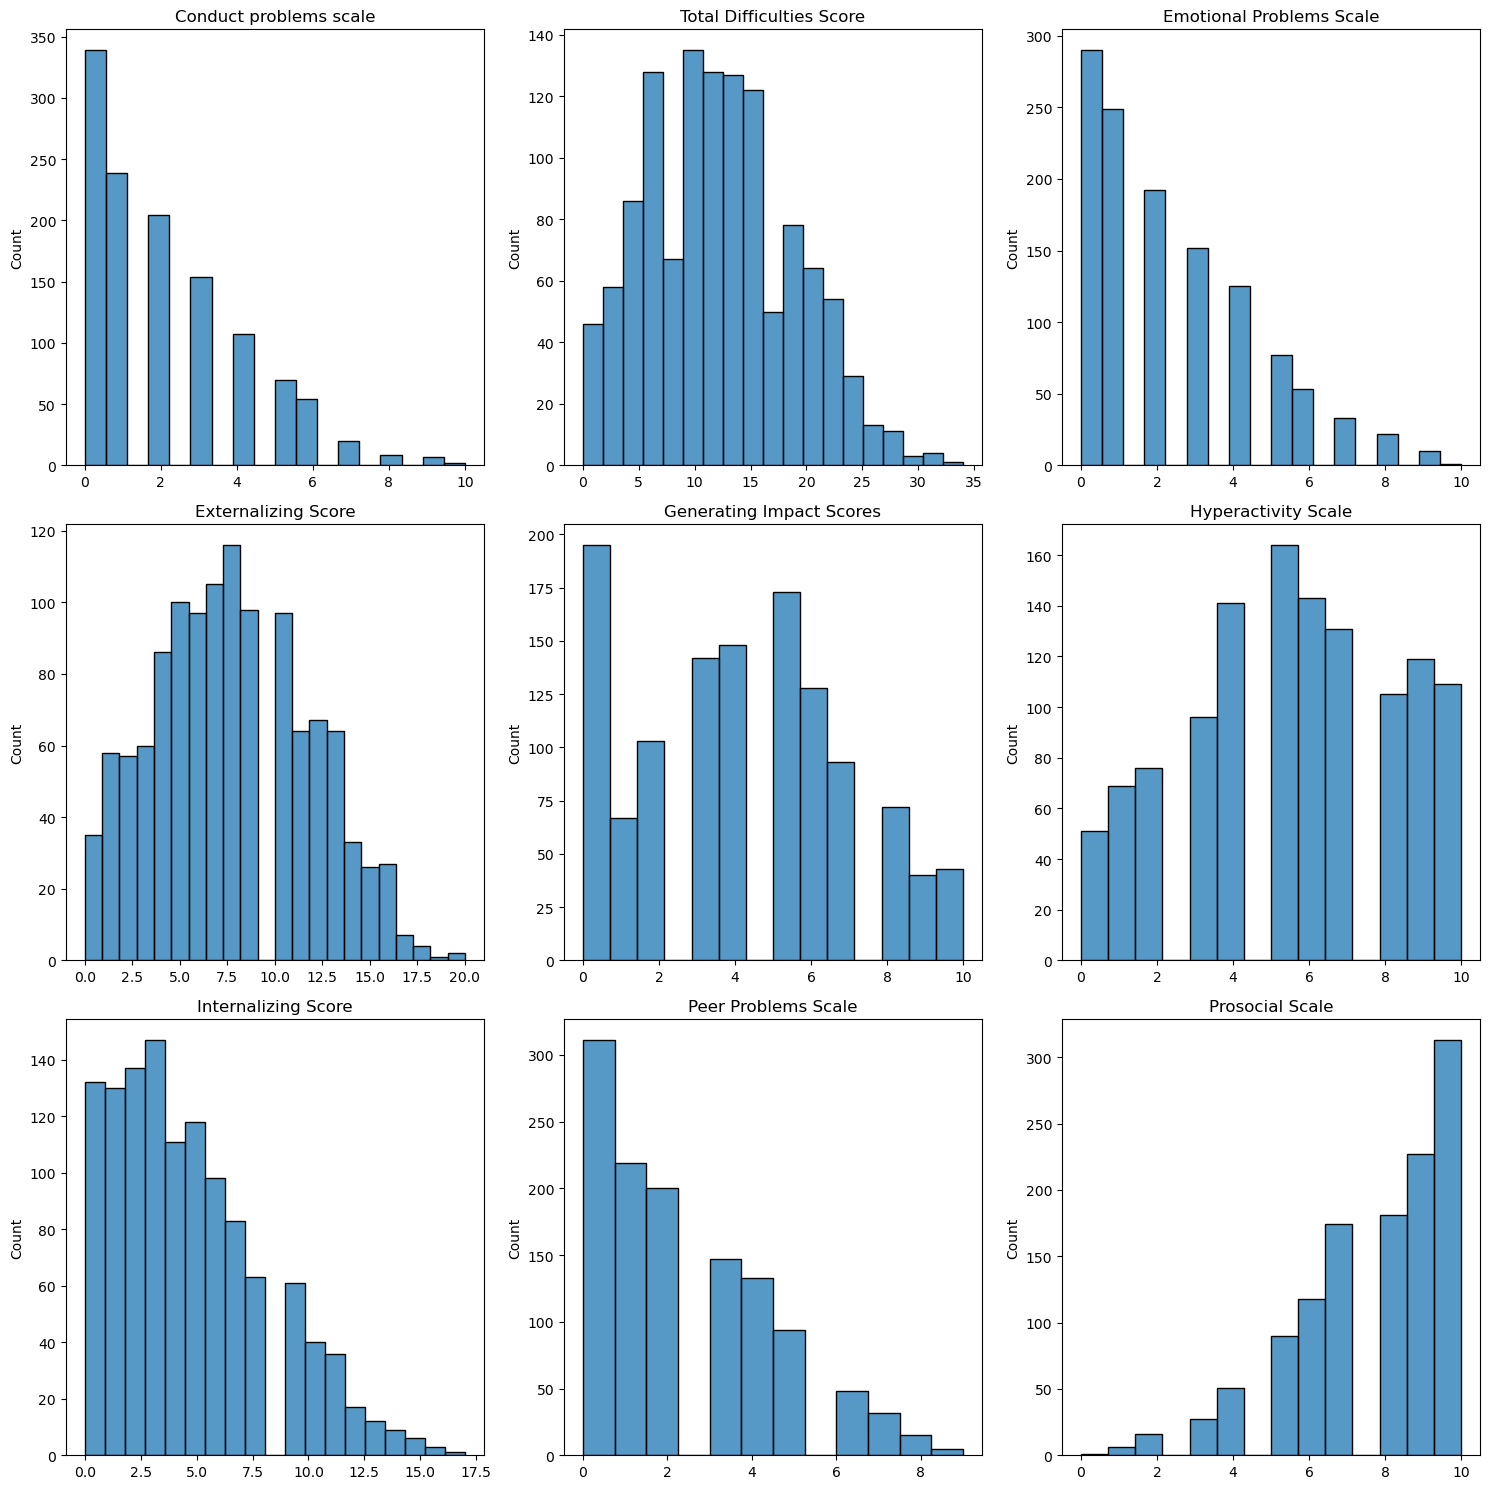

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = iter(axes.flatten())

ax = next(axes)
ax.set_title('Conduct problems scale')
sns.histplot(quantitative_df['SDQ_SDQ_Conduct_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Total Difficulties Score')
sns.histplot(quantitative_df['SDQ_SDQ_Difficulties_Total'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Emotional Problems Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Emotional_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Externalizing Score')
sns.histplot(quantitative_df['SDQ_SDQ_Externalizing'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Generating Impact Scores')
sns.histplot(quantitative_df['SDQ_SDQ_Generating_Impact'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Hyperactivity Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Hyperactivity'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Internalizing Score')
sns.histplot(quantitative_df['SDQ_SDQ_Internalizing'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Peer Problems Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Peer_Problems'], ax=ax)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Prosocial Scale')
sns.histplot(quantitative_df['SDQ_SDQ_Prosocial'], ax=ax)
ax.set_xlabel(None)

fig.tight_layout()

### Analyzing Feature Importance
We can observe how important certain features are to an ADHD Diagnosis or to identifying a female in our dataset by using correlation matrices.
There does not seem to be any obvious correlation between the Strength and Difficulties data and an ADHD diagnosis. These variables seem to have a strong correlation with each other, but not to an ADHD Diagnosis or identifying if the participant is female or male. The only variables that stand out are the hyperactivity score and the externalizing score for the ADHD_Outcome variable.
There is even less of a correlation between the Alabama Parenting Questionnaire answers and the ADHD diagnosis. All of this would make one question whether or not sociodemographic and emotional factors could have a true positive correlation to an ADHD diagnosis or if they could just lead to misdiagnoses due to biases.


ADHD_Outcome                  1.000000
SDQ_SDQ_Hyperactivity         0.558625
SDQ_SDQ_Externalizing         0.514630
SDQ_SDQ_Difficulties_Total    0.464724
SDQ_SDQ_Generating_Impact     0.410349
SDQ_SDQ_Conduct_Problems      0.275598
SDQ_SDQ_Internalizing         0.257269
SDQ_SDQ_Peer_Problems         0.219253
SDQ_SDQ_Emotional_Problems    0.205459
Sex_F                        -0.130836
SDQ_SDQ_Prosocial            -0.190466
Name: ADHD_Outcome, dtype: float64


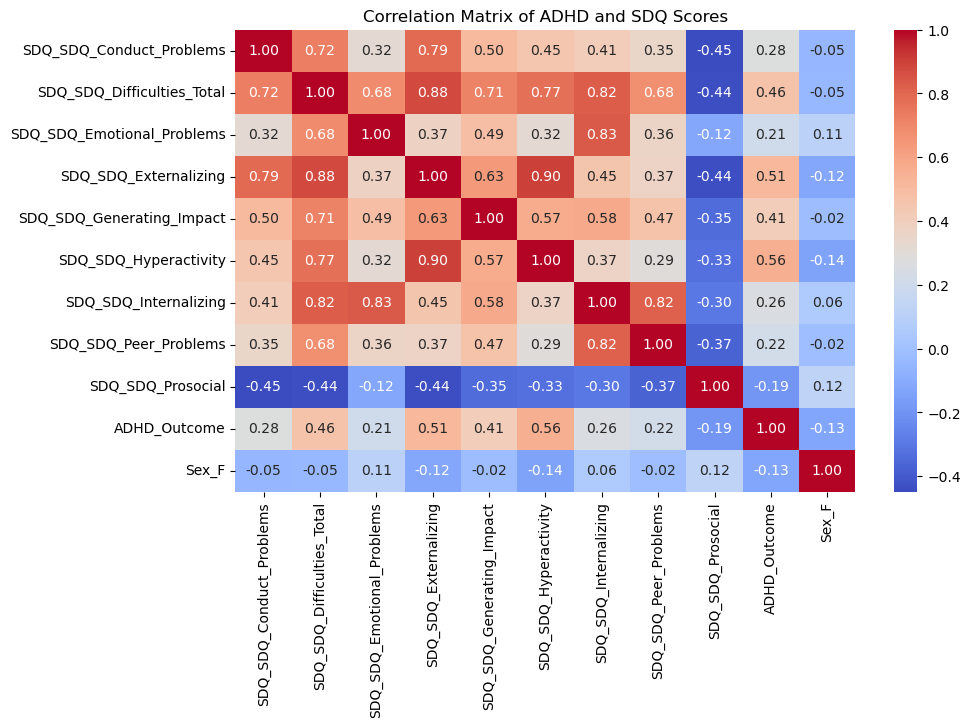

In [37]:
sdq_columns = [col for col in quantitative_df.columns if "sdq" in col.lower()]  
#print(sdq_columns)

sdq_df = quantitative_df[["participant_id"] + sdq_columns]
#sdq_df

sdq_adhd_df = pd.merge(sdq_df, solutions_df, on="participant_id")
droppedcol_df = sdq_adhd_df.drop(columns=["participant_id", "Sex_F_Label"])  # can only create correlation matrix with numerical data, need to drop column with random string of characters that represents participant

correlation_matrix = droppedcol_df.corr()
print(correlation_matrix["ADHD_Outcome"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of ADHD and SDQ Scores")
plt.show()

['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']
ADHD_Outcome       1.000000
APQ_P_APQ_P_OPD    0.141816
APQ_P_APQ_P_ID     0.124358
APQ_P_APQ_P_CP     0.059494
APQ_P_APQ_P_PM     0.025983
APQ_P_APQ_P_PP    -0.015570
APQ_P_APQ_P_INV   -0.099289
Sex_F             -0.130836
Name: ADHD_Outcome, dtype: float64


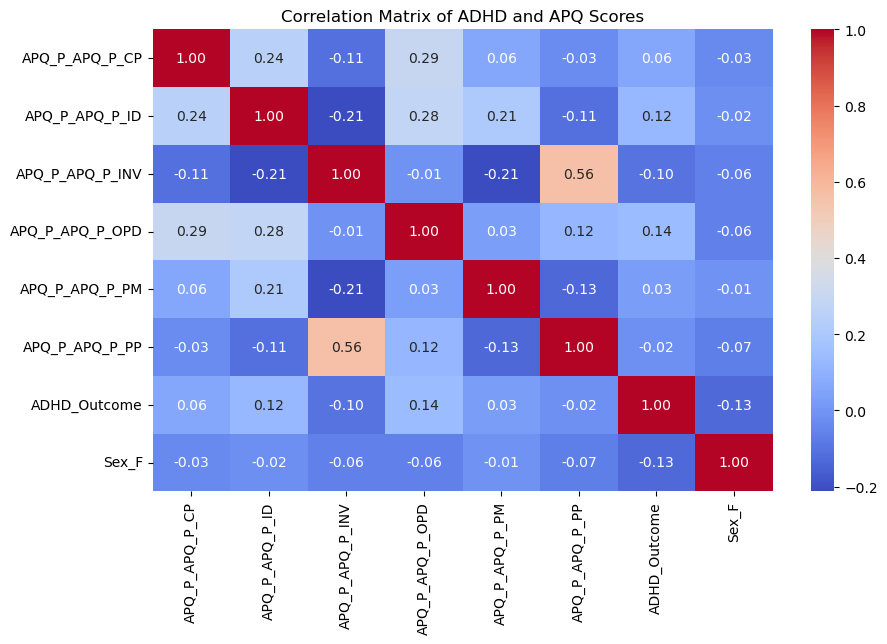

In [38]:
apq_columns = [col for col in quantitative_df.columns if "apq" in col.lower()]  
print(apq_columns)

apq_df = quantitative_df[["participant_id"] + apq_columns]
#sdq_df

apq_adhd_df = pd.merge(apq_df, solutions_df, on="participant_id")
droppedcol_df = apq_adhd_df.drop(columns=["participant_id", "Sex_F_Label"])  # can only create correlation matrix with numerical data, need to drop column with random string of characters that represents participant

correlation_matrix = droppedcol_df.corr()
print(correlation_matrix["ADHD_Outcome"].sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of ADHD and APQ Scores")
plt.show()

### MRI Information

Beginning to analyze our MRI information. There are some categorical variables that state where the scanning occurred and the age of the patient at the time of scanning. 

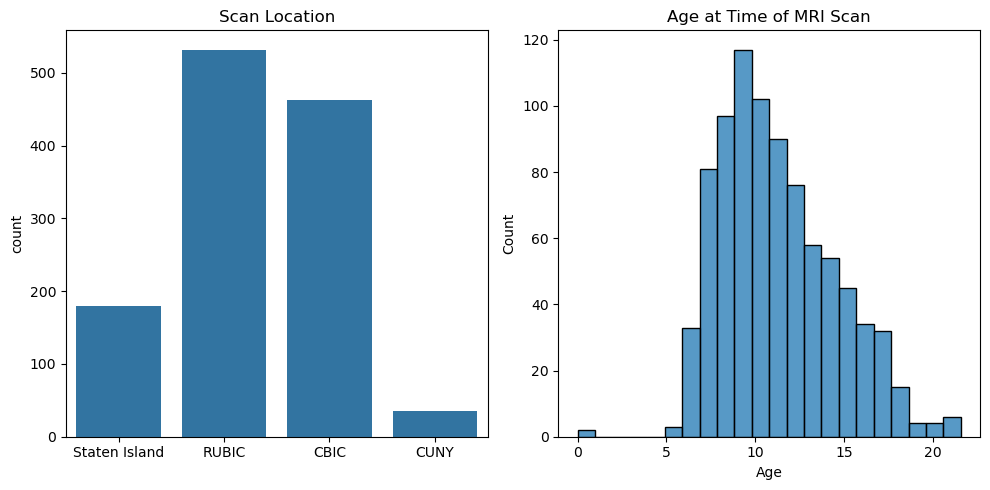

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = iter(axes)

ax = next(axes)
ax.set_title('Scan Location')
sns.countplot(x='MRI_Track_Scan_Location', data=categorical_df, ax=ax)
labels = categorical_labels['MRI_Track_Scan_Location'].values()
ax.set_xticks(range(len(labels)), labels)
ax.set_xlabel(None)

ax = next(axes)
ax.set_title('Age at Time of MRI Scan')
sns.histplot(quantitative_df['MRI_Track_Age_at_Scan'], ax=ax)
ax.set_xlabel("Age")

fig.tight_layout()

## fMRI Connectome Matrix Heatmap Visualization

### What Is a Functional Connectome Matrix?

- **Representation of Connectivity:** Each cell in the matrix represents a measure of the Pearson correlation coefficient (value of -1 indicates perfect negative correlation, 1 indicates perfect positive correlation) of the temporal similarity in fMRI signal fluctuations between two brain regions. In other words, it quantifies how much the activity in one region is statistically related to the activity in another.

- **Structure of the Matrix:**  
  - **Rows and Columns:** Each row and each column corresponds to a specific brain region (or network).  
  - **Symmetry:** These matrices are typically symmetric (i.e., the connection from region A to B is the same as from B to A) because the connectivity measure is usually undirected.
  - **Diagonal Elements:** Often, the diagonal entries represent the self-connection (which are usually trivial, like a correlation of 1).

### What Can We (and the Neural Network) Learn from a Heatmap of Functional Connectome Matrices?

- **Pattern Identification:** Visualizing the matrix as a heat map provides an immediate visual representation of connectivity strength. Colors denote the strength and direction (positive or negative correlation) of connections, which can help identify:
  - **Clusters or Networks:** Areas with similar connectivity profiles often form clusters, suggesting the presence of functional networks in the brain.
  - **Abnormal Patterns:** In clinical studies, differences in connectivity patterns can indicate disruptions related to neurological or psychiatric conditions.

- **Comparison Across Subjects or Conditions:** By examining heat maps from different fMRI scans—whether they belong to different individuals or different experimental conditions—you can:
  - **Detect Variability:** See how functional connectivity varies among individuals, potentially correlating with behavior or cognitive performance.
  - **Evaluate Intervention Effects:** Compare before-and-after scans for a treatment or intervention, observing changes in connectivity that might be associated with improvement or deterioration in brain function.

# Training Data

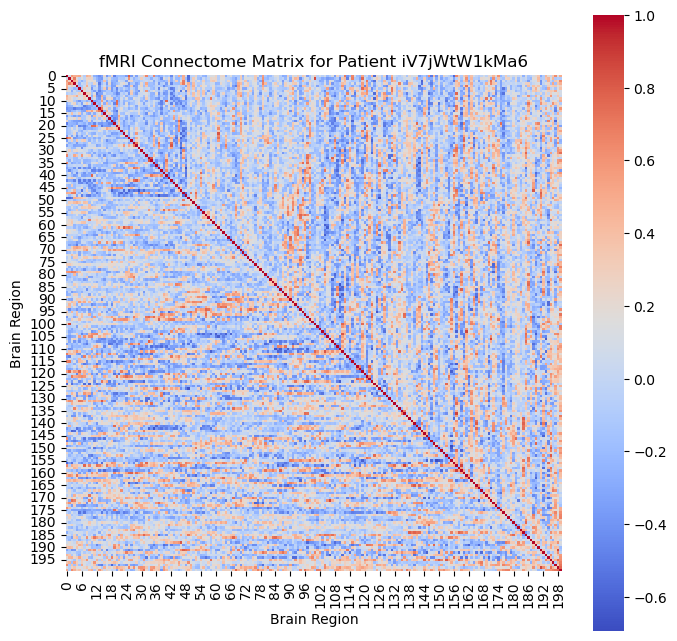

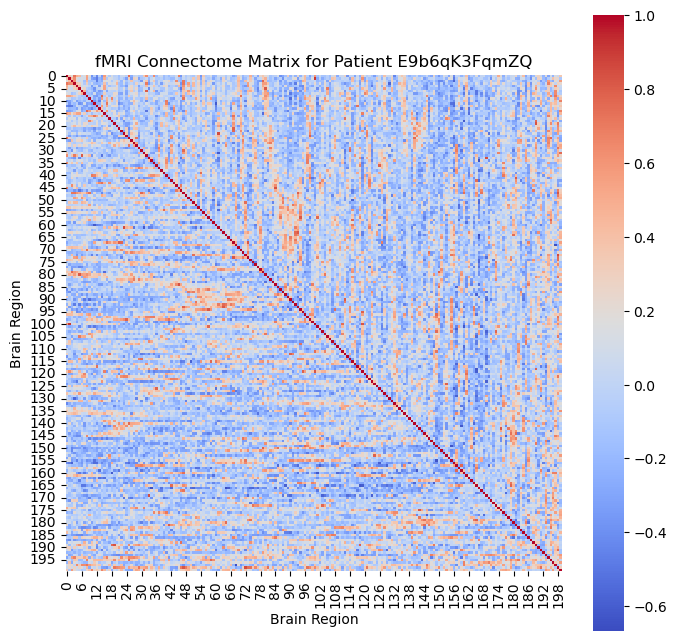

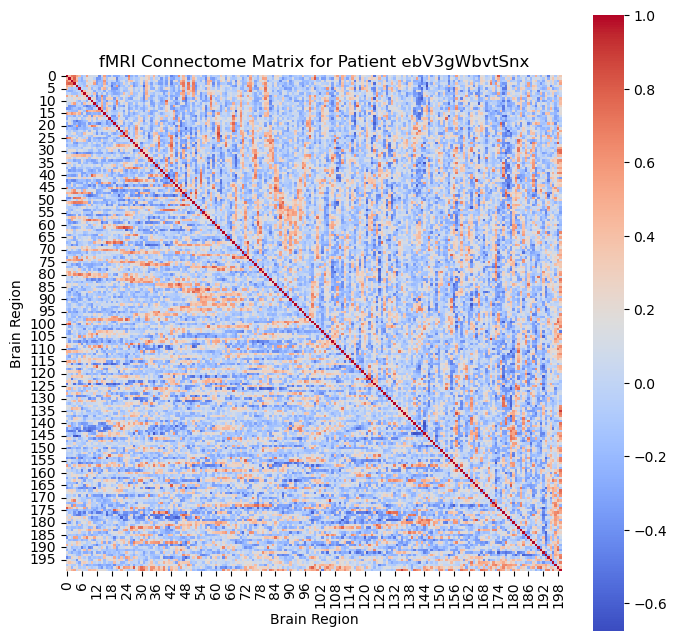

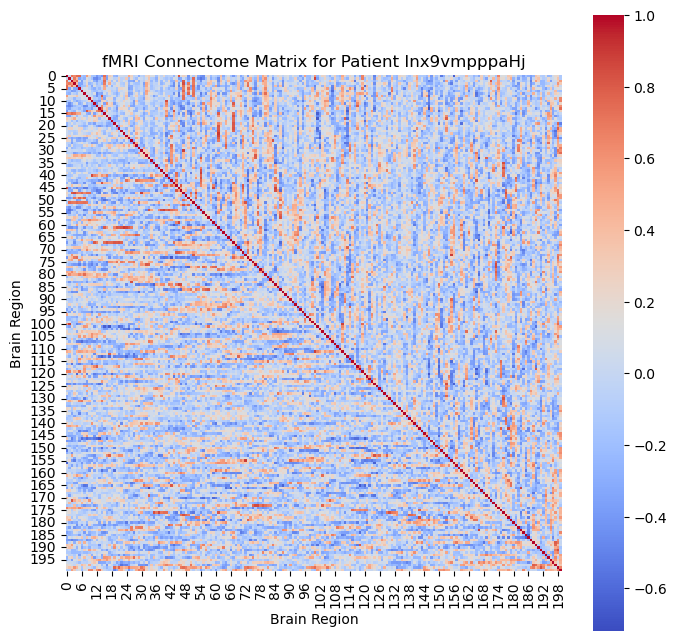

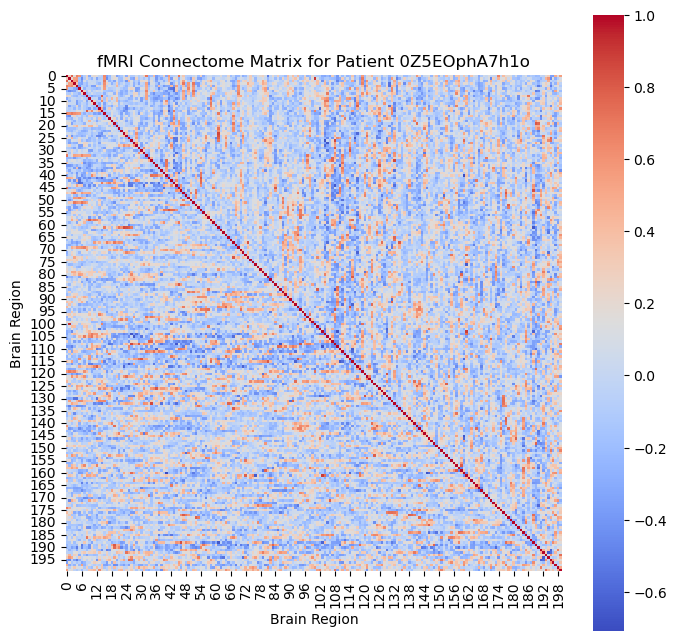

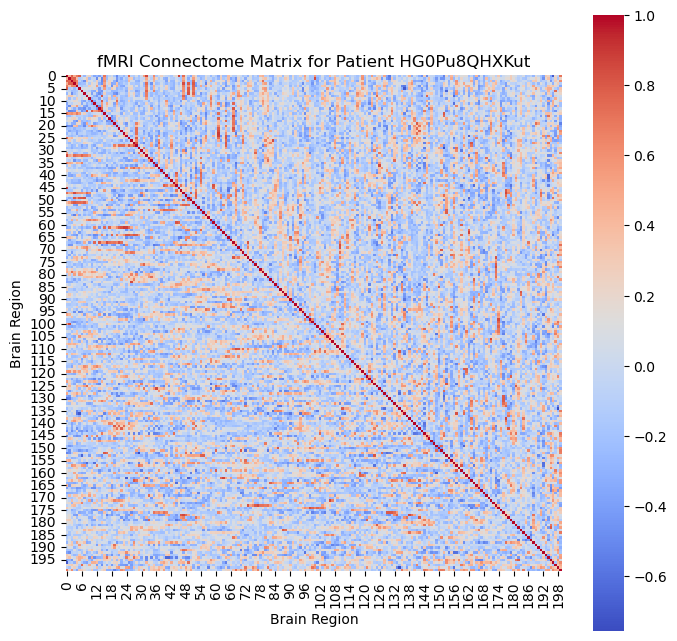

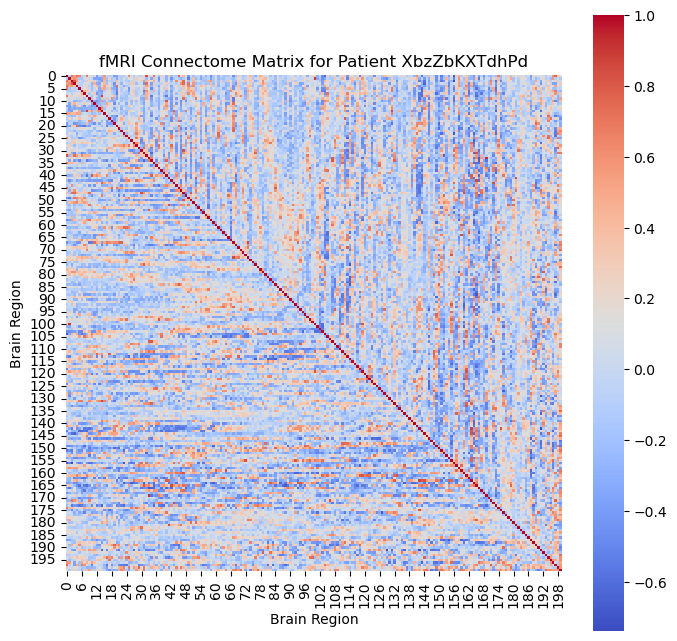

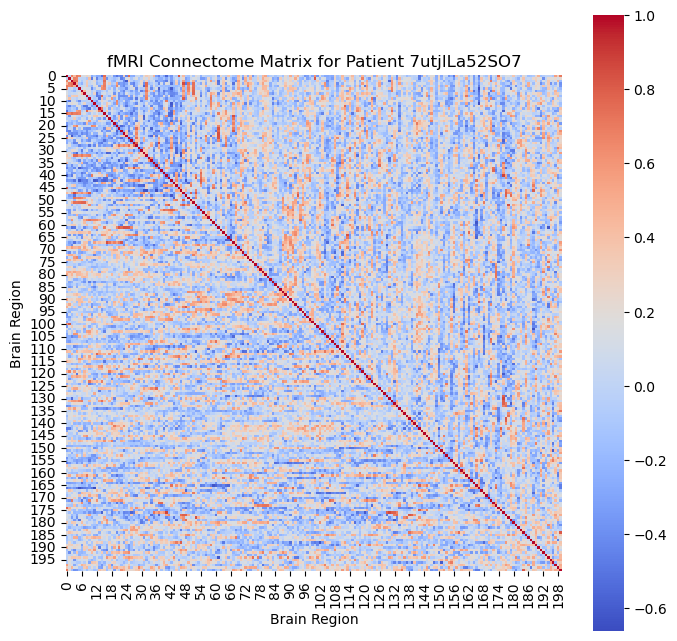

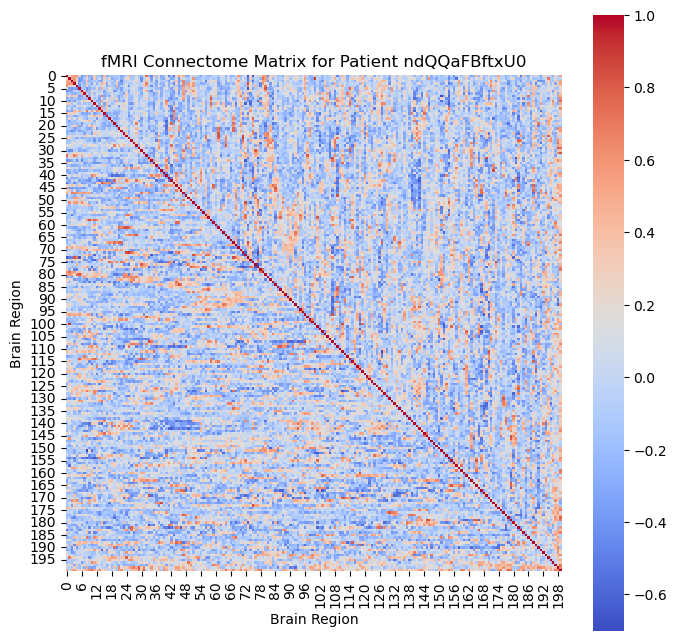

In [43]:
import math
import random
import numpy as np

# Load the connectome CSV file without the first column (which contains patient IDs)
connectome_df_no_labels = pd.read_csv(TRAIN_DIR + '/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv', index_col=0)

for i in range(9):
    # Choose random row index from the connectome matrices table to select which patient's connectome matrices to display
    patient_index = random.randint(0, connectome_df.shape[0] - 1)

    # Get connectome matrix vector for selected patient
    patient_vector = connectome_df_no_labels.iloc[patient_index].values
    vector_length = len(patient_vector)
    # Determine the number of brain regions:
    # Since the vector contains the values for the lower triangle (excluding diagonal) of the matrix,
    # we can find the matrix's dimensions by solving for n in n(n-1)/2 = vector_length:
    # By multiplying both sides by 2: n(n-1) = 2*vector_length
    # By distributing n: n^2 - n = 2*vector_length
    # By subtracting 2*vector_length from both sides: n^2 - n - 2*vector_length = 0
    # Now, let's solve using the quadratic formula, where a = 1, b = -1, and c = 2*vector_length:
    # x = (-b +/- sqrt(b^2 - 4*a*c)) / 2*a --> n = (-(-1) + sqrt((-1)^2 - 4*(1)*(-2*vector_length))) / 2*(1) (we only take the positive root):
    n = int((1 + math.sqrt(1 + 8 * vector_length)) / 2)

    # Reconstruct the symmetric connectivity matrix
    connectome_matrix = np.zeros((n, n))

    # Fill the lower triangle (excluding the diagonal) with the vector values.
    lower_indices = np.tril_indices(n, k=-1)
    connectome_matrix[lower_indices] = patient_vector

    # Since the connectivity matrix is symmetric, mirror the lower triangle to the upper triangle.
    connectome_matrix = connectome_matrix + connectome_matrix.T

    # Fill the diagonal with 1's (since each region perfectly correlates with itself).
    np.fill_diagonal(connectome_matrix, 1)

    # Visualize the connectivity matrices as heatmaps
    plt.figure(figsize=(8, 8))
    plt.title('fMRI Connectome Matrix for Patient ' + connectome_df.iloc[patient_index, 0])
    sns.heatmap(connectome_matrix, cmap='coolwarm', square=True)
    plt.xlabel('Brain Region')
    plt.ylabel('Brain Region')
    plt.show()


# Test Data

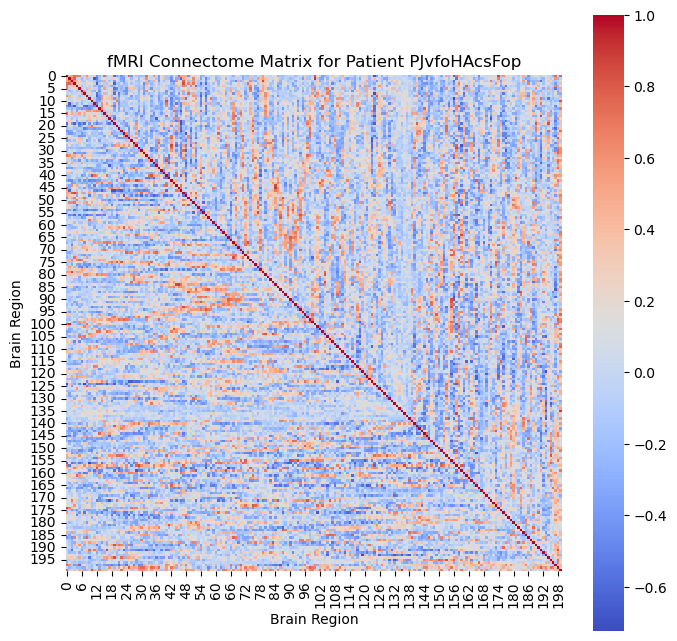

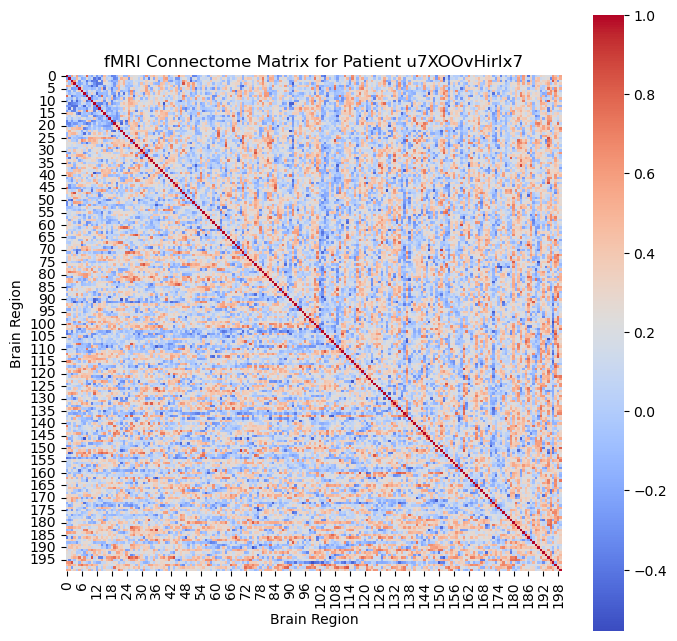

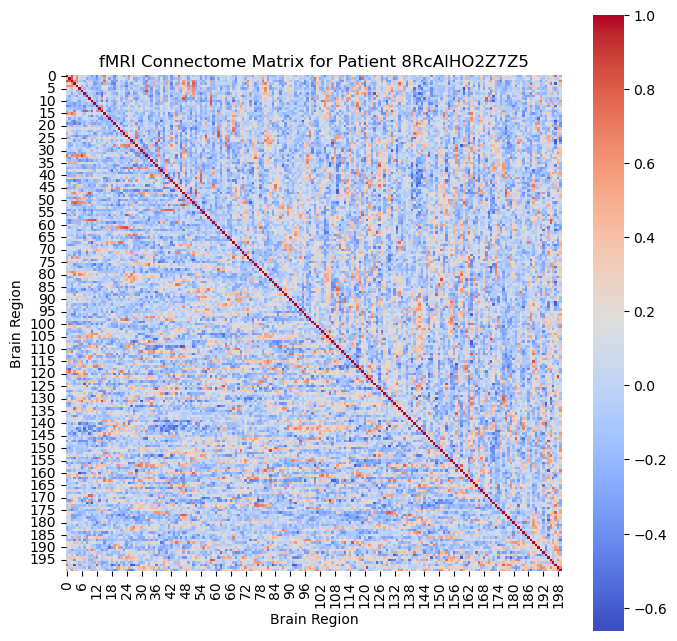

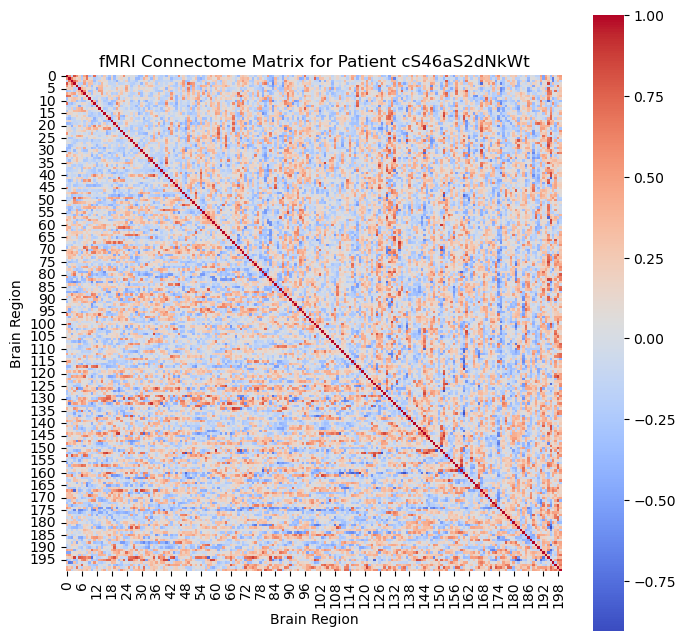

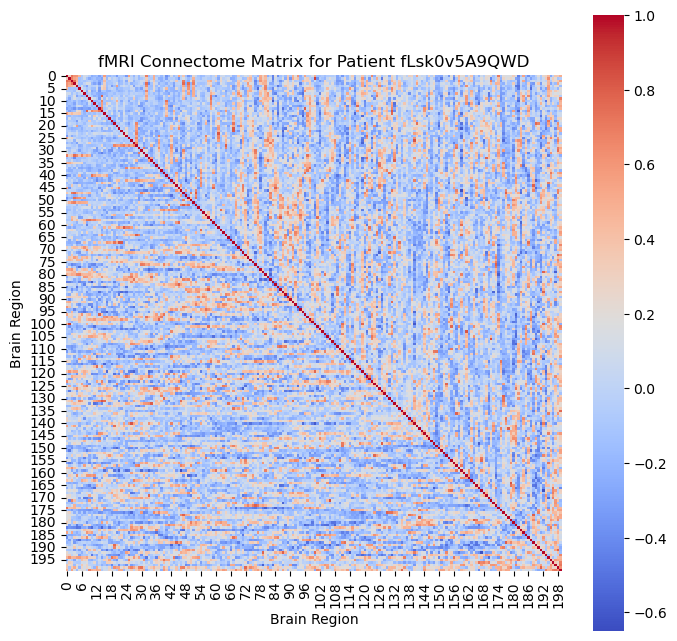

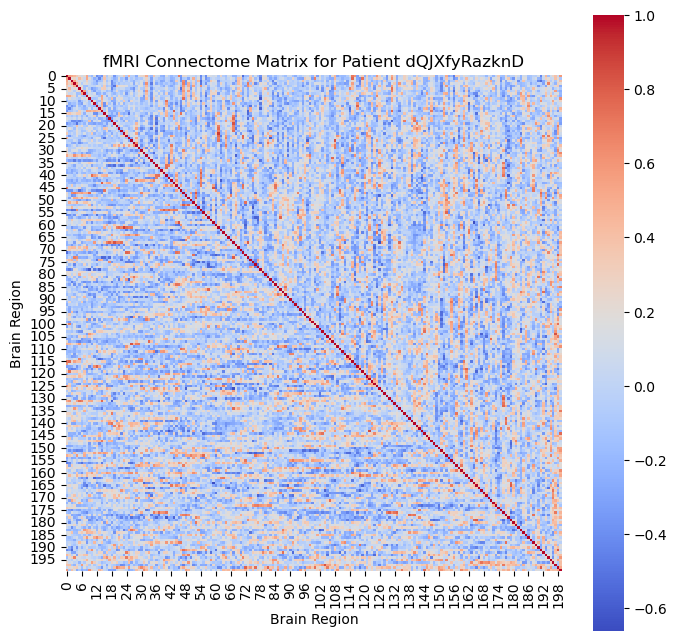

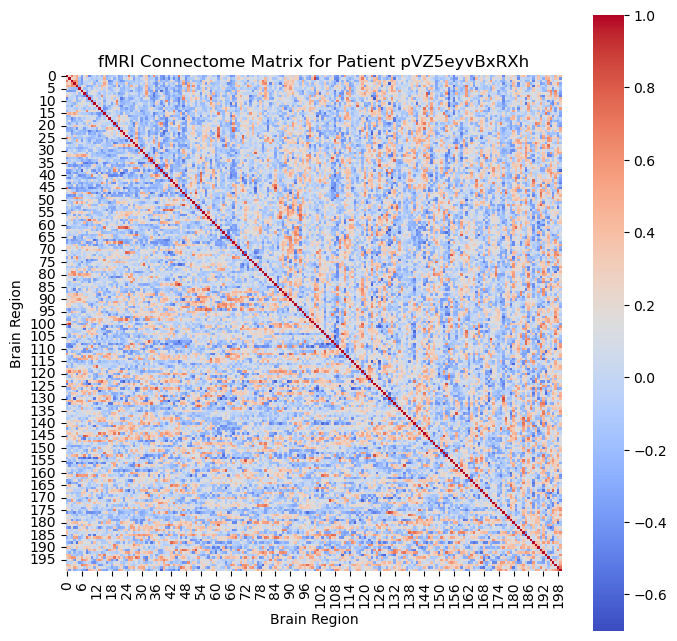

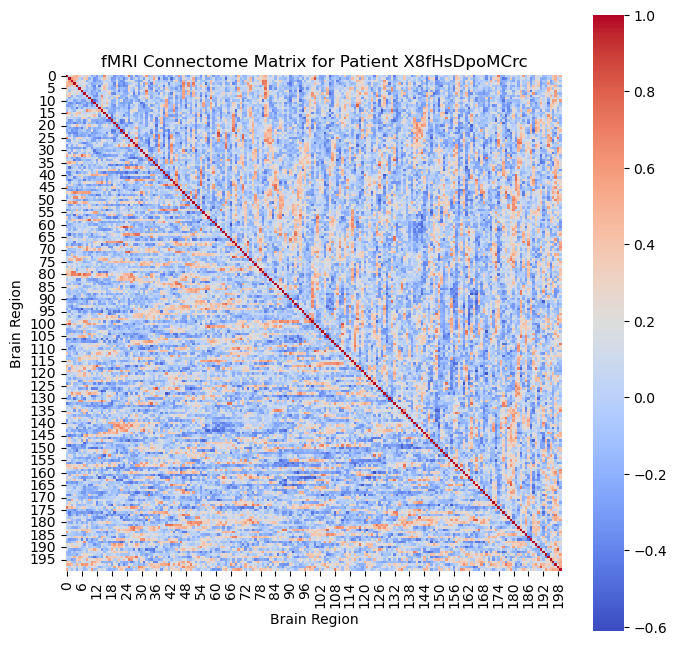

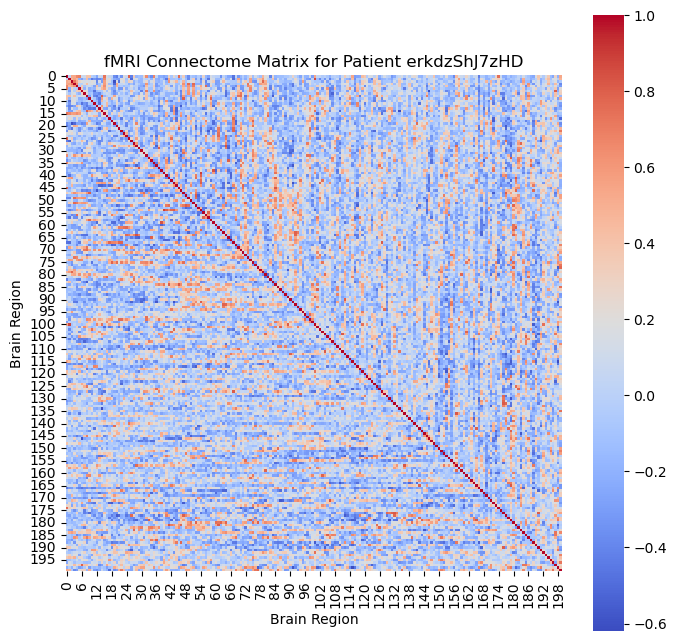

In [45]:
# Load the connectome CSV file without the first column (which contains patient IDs)
connectome_df_test_no_labels = pd.read_csv(TEST_DIR + '/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv', index_col=0)

for i in range(9):
    # Choose random row index from the connectome matrices table to select which patient's connectome matrices to display
    patient_index = random.randint(0, connectome_df_test.shape[0] - 1)

    # Get connectome matrix vector for selected patient
    patient_vector = connectome_df_test_no_labels.iloc[patient_index].values
    vector_length = len(patient_vector)
    # Determine the number of brain regions:
    # Since the vector contains the values for the lower triangle (excluding diagonal) of the matrix,
    # we can find the matrix's dimensions by solving for n in n(n-1)/2 = vector_length:
    # By multiplying both sides by 2: n(n-1) = 2*vector_length
    # By distributing n: n^2 - n = 2*vector_length
    # By subtracting 2*vector_length from both sides: n^2 - n - 2*vector_length = 0
    # Now, let's solve using the quadratic formula, where a = 1, b = -1, and c = 2*vector_length:
    # x = (-b +/- sqrt(b^2 - 4*a*c)) / 2*a --> n = (-(-1) + sqrt((-1)^2 - 4*(1)*(-2*vector_length))) / 2*(1) (we only take the positive root):
    n = int((1 + math.sqrt(1 + 8 * vector_length)) / 2)

    # Reconstruct the symmetric connectivity matrix
    connectome_matrix = np.zeros((n, n))

    # Fill the lower triangle (excluding the diagonal) with the vector values.
    lower_indices = np.tril_indices(n, k=-1)
    connectome_matrix[lower_indices] = patient_vector

    # Since the connectivity matrix is symmetric, mirror the lower triangle to the upper triangle.
    connectome_matrix = connectome_matrix + connectome_matrix.T

    # Fill the diagonal with 1's (since each region perfectly correlates with itself).
    np.fill_diagonal(connectome_matrix, 1)

    # Visualize the connectivity matrices as heatmaps
    plt.figure(figsize=(8, 8))
    plt.title('fMRI Connectome Matrix for Patient ' + connectome_df_test.iloc[patient_index, 0])
    sns.heatmap(connectome_matrix, cmap='coolwarm', square=True)
    plt.xlabel('Brain Region')
    plt.ylabel('Brain Region')
    plt.show()

### Plotting Functional Connectome Pearson Correlation Coefficient Distribution Across All Patients
By plotting this distribution as a histogram, we (and the neural netowrk) can learn:

- **Overall Connectivity Patterns:** The histogram shows the range and frequency of connectivity strengths (from -1 to 1). For example, a concentration of values near zero may indicate generally weak connections, hereas more values toward ±1 suggest stronger or more consistent connectivity between certain brain regions.

- **Data Distribution Characteristics:** The shape of the histogram can reveal underlying patterns amongst the sample group. A bimodal distribution might hint at subgroups within the patient population (e.g., differences between diagnostic groups), while a skewed distribution could indicate that most connections fall within a particular range.

- **Data Quality and Outliers:** Unusual spikes or extended tails in the histogram could signal potential artifacts, noise, or outliers in the data, prompting a closer look at data preprocessing and hyperparameter tuning control.

- **Guidance for Further Analysis:** Understanding the distribution helps in deciding on normalization or transformation techniques, and in determining whether group comparisons or other statistical analyses are warranted based on the connectivity patterns observed.

# Training Data

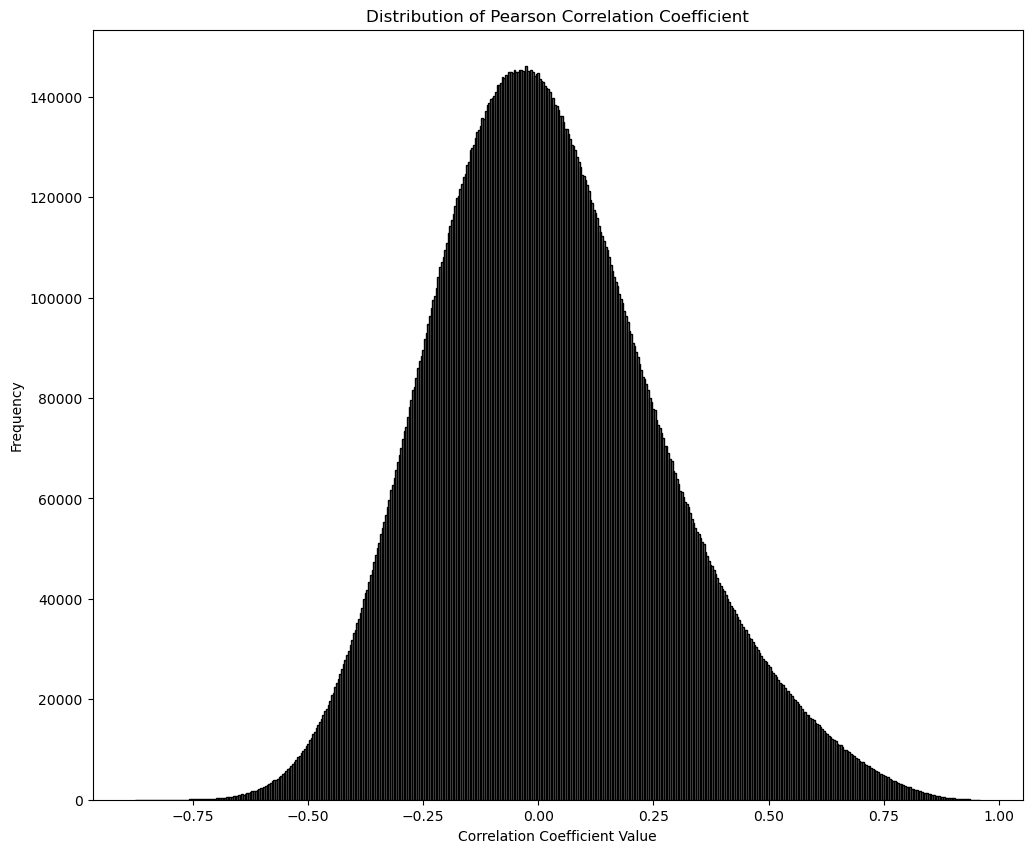

In [48]:
all_values = connectome_df_no_labels.values.flatten()
plt.figure(figsize=(12, 10))
plt.hist(all_values, bins=500, color='grey', edgecolor='black')
plt.title('Distribution of Pearson Correlation Coefficient')
plt.xlabel('Correlation Coefficient Value')
plt.ylabel('Frequency')
plt.show()


# Test Data

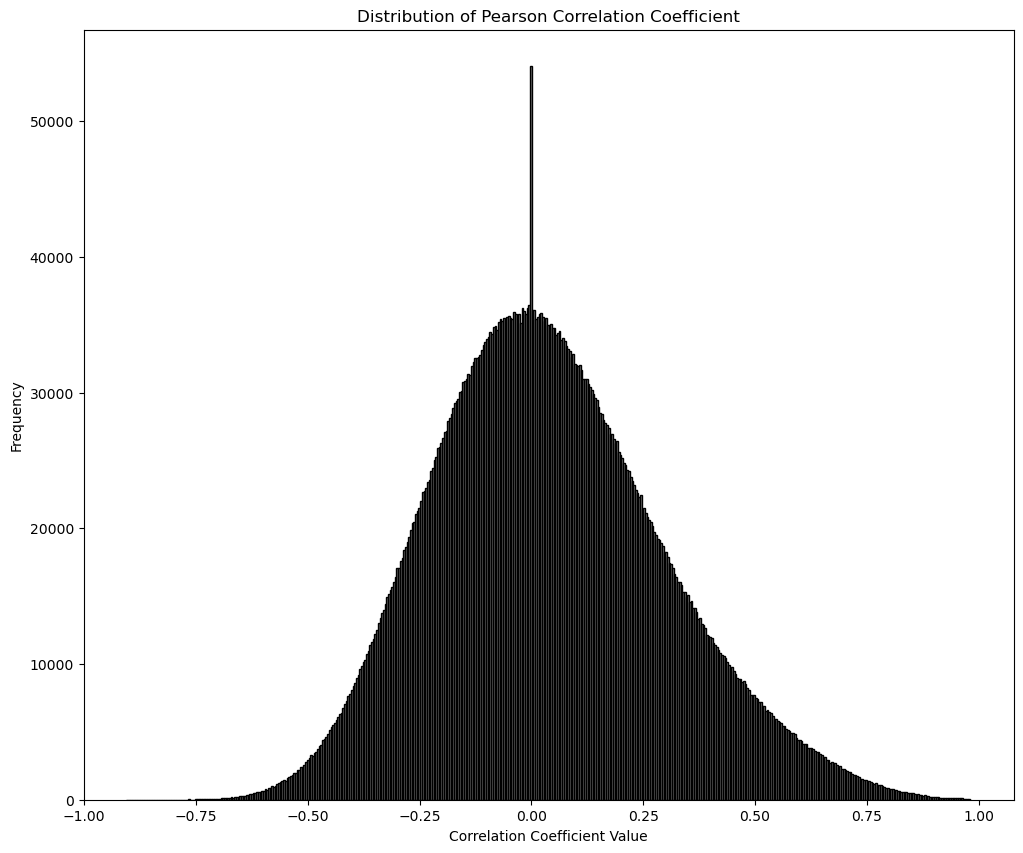

In [50]:
all_values = connectome_df_test_no_labels.values.flatten()
plt.figure(figsize=(12, 10))
plt.hist(all_values, bins=500, color='grey', edgecolor='black')
plt.title('Distribution of Pearson Correlation Coefficient')
plt.xlabel('Correlation Coefficient Value')
plt.ylabel('Frequency')
plt.show()


# Preprocessing
## Random Forest Baseline

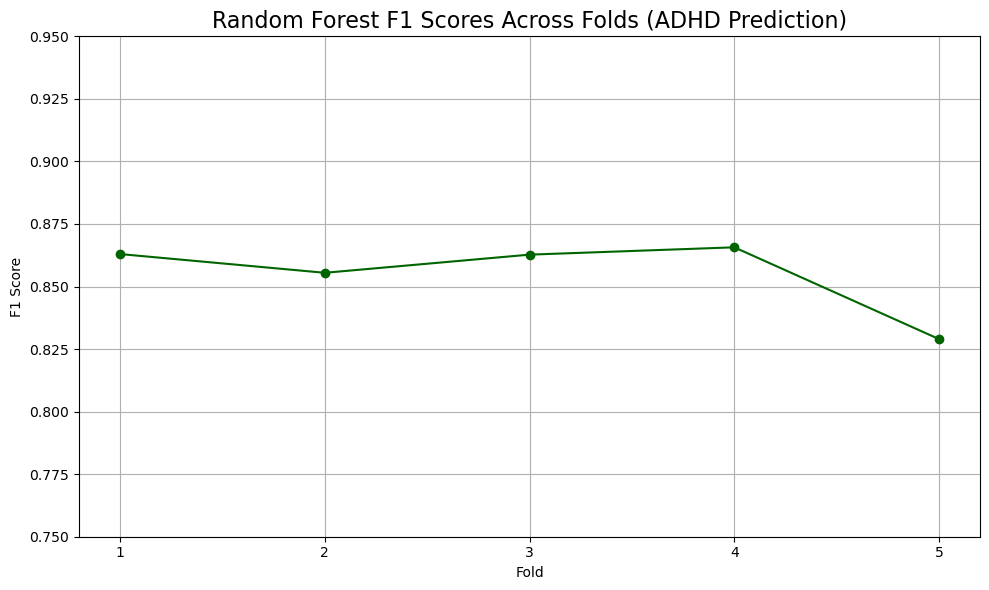

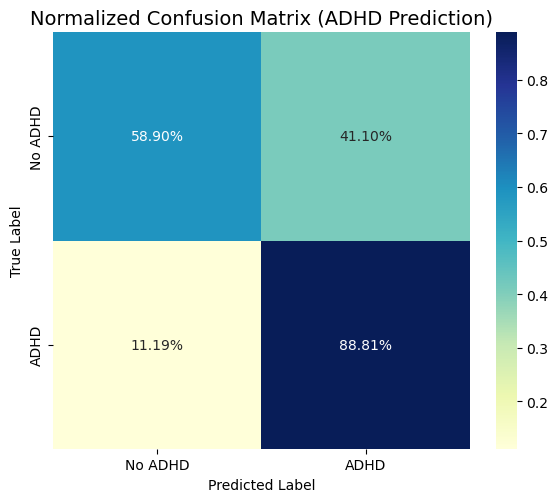


Classification Report (Aggregated Predictions Across Folds):
              precision    recall  f1-score   support

           0      0.708     0.589     0.643       382
           1      0.825     0.888     0.855       831

    accuracy                          0.794      1213
   macro avg      0.766     0.739     0.749      1213
weighted avg      0.788     0.794     0.788      1213



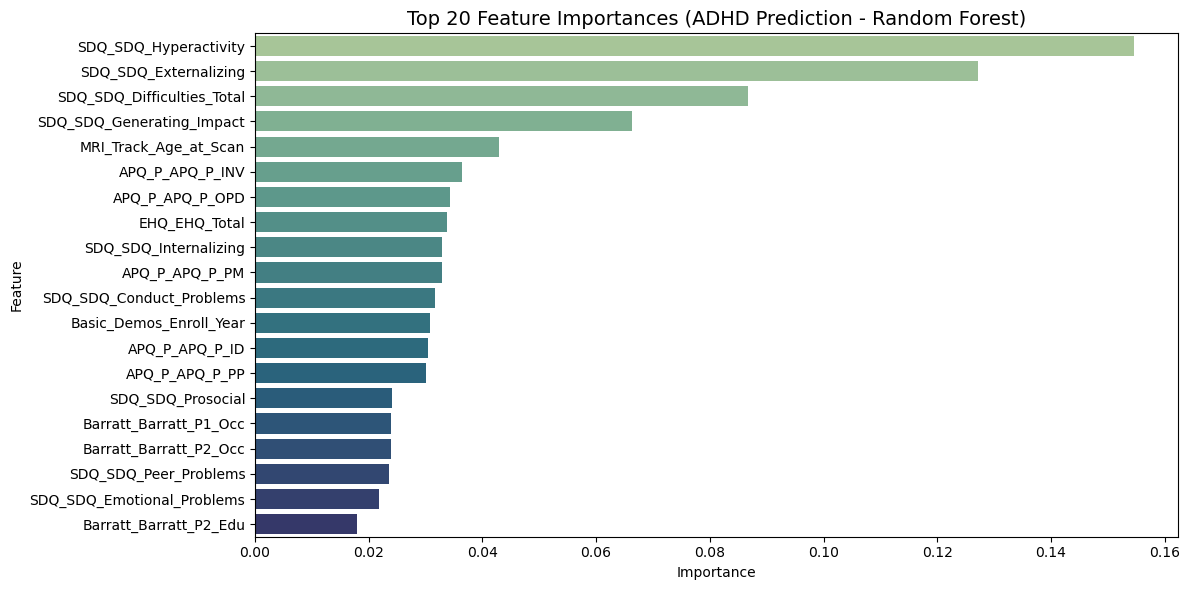

In [52]:
# --- Imports ---
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# --- Load Data ---
train_categorical = pd.read_excel("./data/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")
train_quantitative = pd.read_excel("./data/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")
solutions = pd.read_excel("./data/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")

# --- Merge Datasets ---
merged_df = pd.merge(train_categorical, train_quantitative, on="participant_id", how="inner")
merged_df = pd.merge(merged_df, solutions, on="participant_id", how="inner")

# --- Prepare Features and Labels ---
X = merged_df.drop(columns=["participant_id", "ADHD_Outcome", "Sex_F"])
y = merged_df["ADHD_Outcome"]

# --- Encode Categorical Columns ---
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

# --- Impute Missing Values and Scale ---
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
X_processed = pipeline.fit_transform(X_encoded)

# --- Train Random Forest ---
best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    bootstrap=True,
    random_state=42
)

# --- Cross-validation ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = []
y_preds = []
y_vals = []

for train_idx, val_idx in skf.split(X_processed, y):
    X_train, X_val = X_processed[train_idx], X_processed[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_val)

    rf_scores.append(f1_score(y_val, y_pred))
    y_preds.extend(y_pred)
    y_vals.extend(y_val)

# --- F1 Score Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rf_scores, marker='o', linestyle='-', color='darkgreen')
plt.title("Random Forest F1 Scores Across Folds (ADHD Prediction)", fontsize=16)
plt.xlabel("Fold")
plt.ylabel("F1 Score")
plt.ylim(0.75, 0.95)
plt.xticks(range(1, 6))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Confusion Matrix ---
conf_mat = confusion_matrix(y_vals, y_preds)
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_norm, annot=True, cmap="YlGnBu", fmt=".2%", square=True, cbar=True)
plt.title("Normalized Confusion Matrix (ADHD Prediction)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0.5, 1.5], ["No ADHD", "ADHD"])
plt.yticks([0.5, 1.5], ["No ADHD", "ADHD"])
plt.tight_layout()
plt.show()

# --- Classification Report ---
print("\nClassification Report (Aggregated Predictions Across Folds):")
print(classification_report(y_vals, y_preds, digits=3))

# --- Feature Importances (Top 20) ---
best_rf.fit(X_processed, y)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_encoded.columns

# creating DataFrame with dummy hue to satisfy palette
top_features_df = pd.DataFrame({
    'Feature': feature_names[indices[:20]],
    'Importance': importances[indices[:20]],
    'Hue': range(20)
})

plt.figure(figsize=(12, 6))
sns.barplot(data=top_features_df, x='Importance', y='Feature', hue='Hue', palette='crest', dodge=False, legend=False)
plt.title("Top 20 Feature Importances (ADHD Prediction - Random Forest)", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# Report (it's for write-up reference)

# Random Forest Baseline - ADHD Classification Report
#
# 1. Data Preparation:
#    - Merged categorical and quantitative participant data using 'participant_id'.
#    - Encoded categorical features using label encoding.
#    - Handled missing values using mean imputation and applied standard scaling.
#
# 2. Modeling:
#    - Trained a RandomForestClassifier with 500 trees, balanced class weights,
#      and optimized parameters to reduce overfitting.
#    - Evaluated model performance using 5-fold stratified cross-validation.
#
# 3. Evaluation:
#    - F1 scores across folds ranged between ~0.82 and ~0.87.
#    - Confusion matrix revealed class-wise prediction strength with normalization.
#    - Classification report showed high recall for the ADHD class, indicating strong sensitivity.
#
# 4. Visualization:
#    - F1 scores were plotted across folds to show stability.
#    - A normalized confusion matrix was created for intuitive performance review.
#    - A barplot highlighted the top 20 most important features based on impurity-based importance.
#
# Conclusion:
# This pipeline delivers a well-rounded and interpretable baseline for predicting ADHD
# using sociodemographic and behavioral metadata. It serves as a strong foundation for
# future integration with neuroimaging data or more complex models.

# ------------------------------------------------------------------------------


## GNN

In [64]:
!pip install torch_geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00a 0:00:01


In [66]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [100]:
# get the number of patients and the length of the vector for each patient
num_patients = connectome_df_no_labels.shape[0]
vector_length = connectome_df_no_labels.shape[1]

# reconstruct the matrix size from the vector length
n = int((1 + math.sqrt(1 + 8 * vector_length)) / 2)  # should be 200

# initialize a 3d numpy array to store all matrices
connectome_array = np.zeros((num_patients, n, n))

# fill the array with each patient's full matrix
for patient_index in range(num_patients):
    patient_vector = connectome_df_no_labels.iloc[patient_index].values

    matrix = np.zeros((n, n))
    lower_indices = np.tril_indices(n, k=-1)
    matrix[lower_indices] = patient_vector
    matrix = matrix + matrix.T  # make it symmetric
    np.fill_diagonal(matrix, 1)  # set diagonal to 1

    connectome_array[patient_index] = matrix

# convert our data to torch tensors
connectivity_matrices = torch.tensor(connectome_array).float()
labels_sex = torch.tensor(solutions['Sex_F']).float()
labels_diagnosis = torch.tensor(solutions['ADHD_Outcome']).float()

# stack the target variable labels
labels = torch.stack([labels_diagnosis, labels_sex],dim=1)

# create graph data objects for each matrix
data_list = []
for i in range(len(connectivity_matrices)):
    matrix = connectivity_matrices[i]
    edge_index = (matrix > 0).nonzero(as_tuple=False).t() # create edges based on non-zero entries
    edge_attr = matrix[edge_index[0], edge_index[1]] # edge weights are the matrix values
    x = torch.eye(200) # node features (identity matrix as features)

    # create graph data object
    graph_data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=labels[i].unsqueeze(0))
    data_list.append(graph_data)

torch.manual_seed(192024)

# can apply a data split here --> training, test, validation